# Name: Ali Mohamed Ali
# Task 1: Prediction Using Supervied ML

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
url = "http://bit.ly/w-data"
score = pd.read_csv(url)

In [3]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Preprocessing Data

In [5]:
score.duplicated().sum()

0

In [6]:
score.isna().sum()

Hours     0
Scores    0
dtype: int64

## EDA

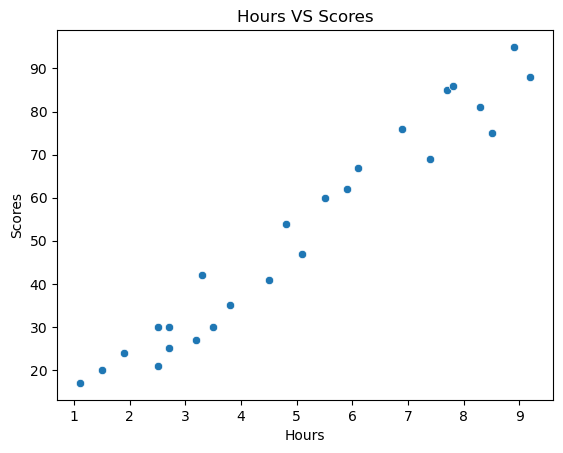

In [7]:
sns.scatterplot(data=score,x="Hours",y="Scores")
plt.title("Hours VS Scores")
plt.show()

## Splitting Data

In [8]:
# X = score[["Hours"]].values
# X = score["Hours"].values.reshape(-1,1)
# X = score.Hours.values
X = score.iloc[:, :-1].values  

In [9]:
# y = score[["Scores"]].values
# y = score["Scores"].values.reshape(-1,1)  
# y = score.Scores.values
y = score.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) 

## Build and Test Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
A = model.coef_ # The Paramter of X
A

array([9.68207815])

In [14]:
B = model.intercept_  # The Intercept of y
B

2.826892353899737

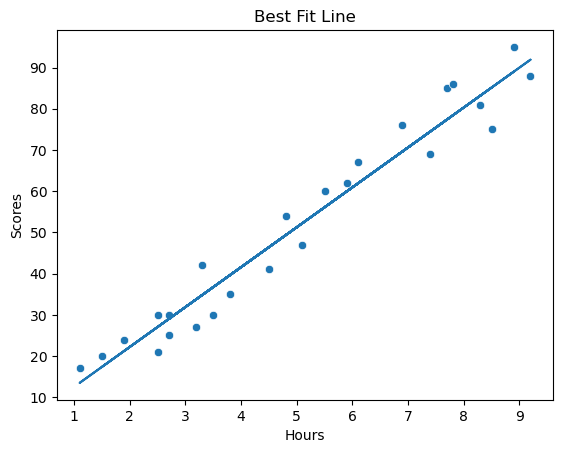

In [15]:
# y = 3.4 + 9.7*X
y = B + A*X
plt.plot(X,y)
sns.scatterplot(data=score,x="Hours",y="Scores")
plt.title("Best Fit Line")
plt.show()

## Prediction

In [16]:
y_pred = model.predict(X_test)

## Model Evalution

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f"R2: {r2_score(y_pred,y_test)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred,y_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_pred,y_test)}")

R2: 0.9633493914970949
Mean Squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244


## Model Deployment

In [18]:
import pickle

with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

## Thanks 🥰